In [1]:
# My idea:
# do basically the same thing we did previously, for ten random stars per dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import astropy.table
import atpy

In [5]:
# start with WSERV7, where we calibrated everything for

cleaned_data_w7 = atpy.Table(os.path.join(prototype_output_path, 'DUMMY_graded_clipped0.95_scrubbed0.1_dusted0.5.h5'))


NameError: name 'prototype_output_path' is not defined

Auto-detected table type: fits
Auto-detected table type: fits
Auto-detected table type: hdf5


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/atpy/decorators.py:56: ResourceWarning: unclosed file <_io.BufferedReader name='/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv7/WSERV7_graded_clipped0.95_scrubbed0.1_dusted0.5.h5'>
  header = open(filename, 'rb').read(4)


Text(0.5, 0, 'Modified Julian Date')

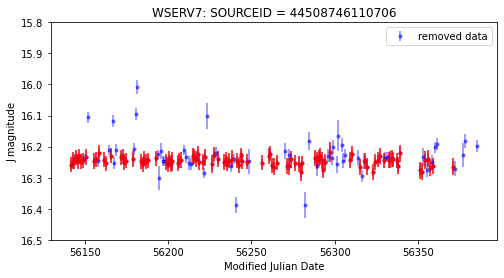

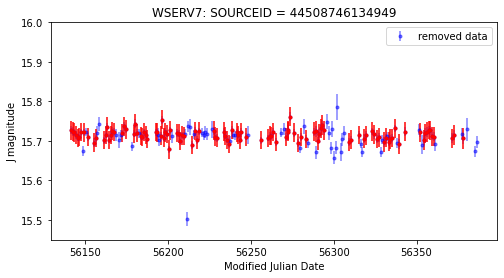

In [13]:
# let's start with the EXACT STARS that we were working with earlier
path_to_prototype = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads/prototype/"
prototype_input_file = os.path.join(path_to_prototype, "wserv7_nodupes_timeslice.lt56200_magslice.jhk.btw.13.16.fits.gz")
prototype_output_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/prototypes/"

old_data = atpy.Table(prototype_input_file)
path_to_full_unclean_WSERV7 = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads/wserv7.fits.gz"
data = atpy.Table(path_to_full_unclean_WSERV7)
# cleaned_data = atpy.Table(os.path.join(prototype_output_path, 'DUMMY_graded_clipped0.95_scrubbed0.1_dusted0.5.h5'))
cleaned_data = atpy.Table("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv7/WSERV7_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

some_star = np.unique(old_data['SOURCEID'])[1003]
some_star_old_data = data.where((data.SOURCEID == some_star) & (data.JAPERMAG3 > 0))
some_star_new_data = cleaned_data.where((cleaned_data.SOURCEID == some_star) & (cleaned_data.JAPERMAG3 > 0))

od = some_star_old_data
nd = some_star_new_data

plt.figure(figsize=(8,4))
plt.errorbar(od.MEANMJDOBS, od.JAPERMAG3, yerr=od.JAPERMAG3ERR, fmt='b.', alpha=0.5, label='removed data')
plt.errorbar(nd.MEANMJDOBS, nd.JAPERMAG3, yerr=nd.JAPERMAG3ERR, fmt='r.')
plt.ylim(16.5,15.8)
plt.legend()
plt.title(f'WSERV7: SOURCEID = {some_star}')
plt.ylabel("J magnitude")
plt.xlabel("Modified Julian Date")

some_star2 = np.unique(old_data['SOURCEID'])[2005]

some_star2_old_data = data.where((data.SOURCEID == some_star2) & (data.JAPERMAG3 > 0))
some_star2_new_data = cleaned_data.where((cleaned_data.SOURCEID == some_star2) & (cleaned_data.JAPERMAG3 > 0))

od2 = some_star2_old_data
nd2 = some_star2_new_data

plt.figure(figsize=(8,4))
plt.errorbar(od2.MEANMJDOBS, od2.JAPERMAG3, yerr=od2.JAPERMAG3ERR, fmt='b.', alpha=0.5, label='removed data')
plt.errorbar(nd2.MEANMJDOBS, nd2.JAPERMAG3, yerr=nd2.JAPERMAG3ERR, fmt='r.')
# plt.ylim(17.4,16.2)
plt.ylim(15.45,16.0)
plt.legend()
plt.title(f'WSERV7: SOURCEID = {some_star2}')
plt.ylabel("J magnitude")
plt.xlabel("Modified Julian Date")

In [47]:
def removal_figure(od, nd, sourceid, band='J', survey='', null=-999999500.0, figsize=(8,4)):

    ods = od[od['SOURCEID'] == sourceid]
    nds = nd[nd['SOURCEID'] == sourceid]
    
    ods[f'{band}APERMAG3'][ods[f'{band}APERMAG3']==null] = np.nan
    nds[f'{band}APERMAG3'][nds[f'{band}APERMAG3']==null] = np.nan
    ods[f'{band}APERMAG3ERR'][ods[f'{band}APERMAG3ERR']==null] = np.nan
    nds[f'{band}APERMAG3ERR'][nds[f'{band}APERMAG3ERR']==null] = np.nan

    fig = plt.figure(figsize=figsize)

    plt.errorbar(ods['MEANMJDOBS'], ods[f'{band}APERMAG3'], yerr=ods[f'{band}APERMAG3ERR'], fmt='b.', alpha=0.5, label='removed data')
    plt.errorbar(nds['MEANMJDOBS'], nds[f'{band}APERMAG3'], yerr=nds[f'{band}APERMAG3ERR'], fmt='r.')
    
    plt.gca().invert_yaxis()
    
    plt.legend()
    plt.title(f'{survey}: SOURCEID = {some_star}')
    plt.ylabel(f"{band} magnitude")
    plt.xlabel("Modified Julian Date")

In [53]:
# now let's do ten random stars from wserv7 and reproduce this!
# but like, with astropy tables. because, like, come on.

path_to_full_unclean_WSERV7 = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads/wserv7.fits.gz"
unclean_data_w7 = astropy.table.Table.read(path_to_full_unclean_WSERV7)
# cleaned_data = atpy.Table(os.path.join(prototype_output_path, 'DUMMY_graded_clipped0.95_scrubbed0.1_dusted0.5.h5'))
cleaned_data_w7 = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv7/WSERV7_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

choosing_data_w7 = cleaned_data_w7[
    (cleaned_data_w7['JAPERMAG3'] > 12) & 
    (cleaned_data_w7['HAPERMAG3'] > 12) & 
    (cleaned_data_w7['KAPERMAG3'] > 12) & 
    (cleaned_data_w7['JAPERMAG3'] < 16) & 
    (cleaned_data_w7['HAPERMAG3'] < 16) & 
    (cleaned_data_w7['KAPERMAG3'] < 16)
]



[44508746127607 44508746125564 44508746127830 44508746131658
 44508746137342 44508746127851 44508746120939 44508746099538
 44508746097113 44508746111539]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


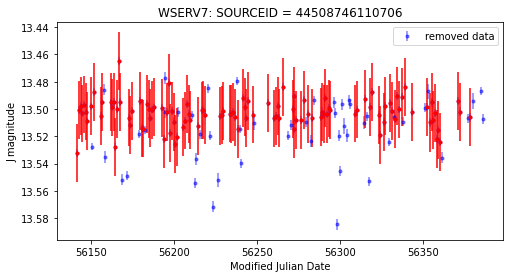

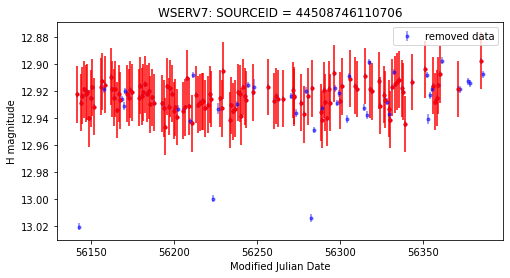

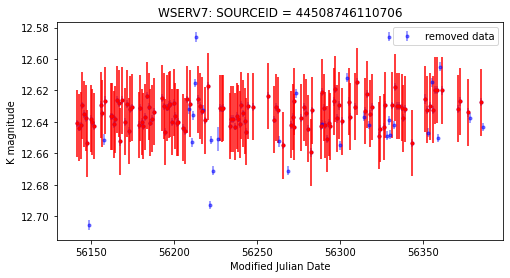

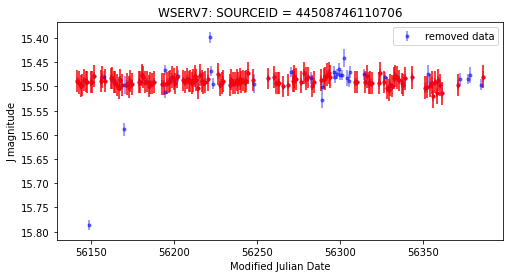

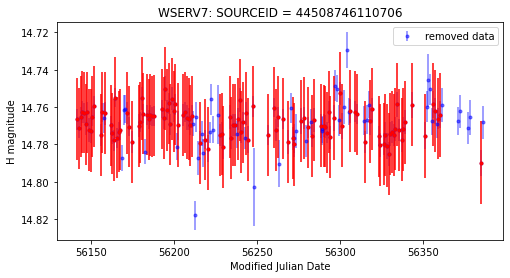

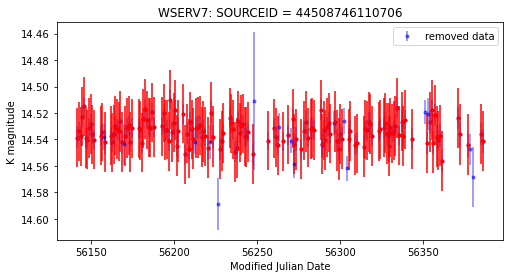

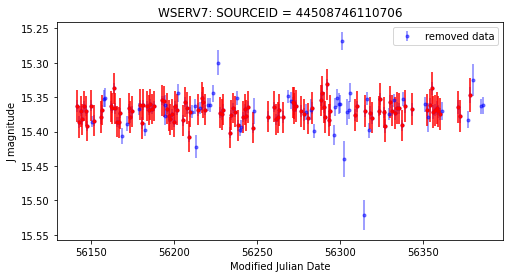

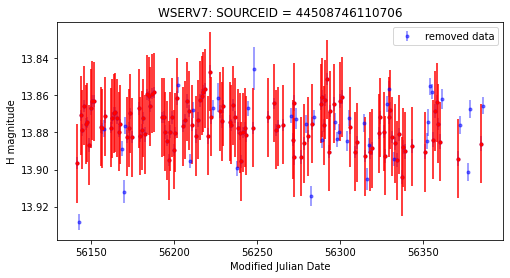

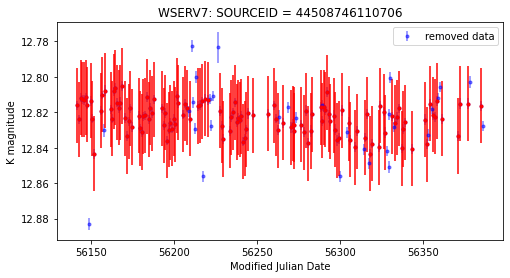

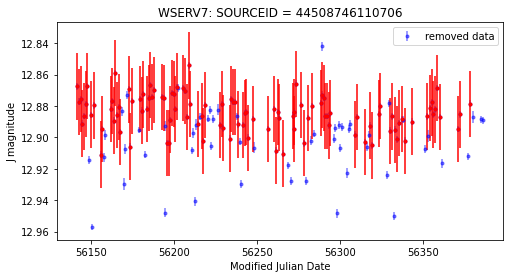

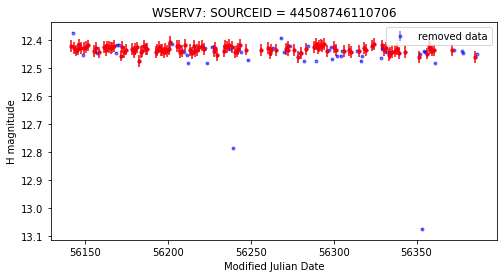

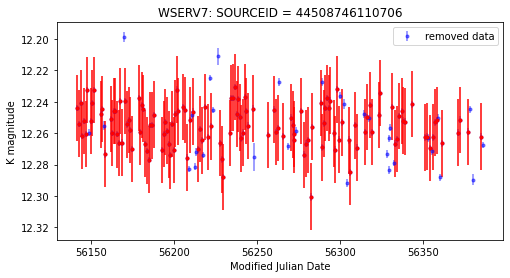

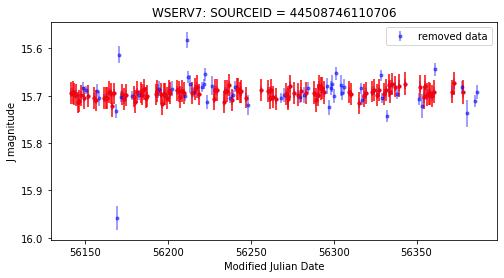

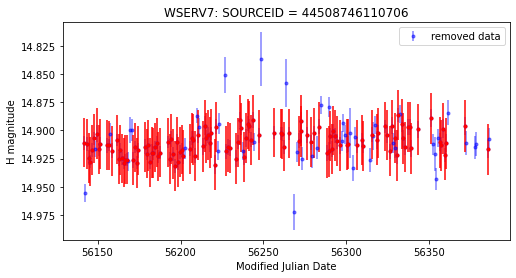

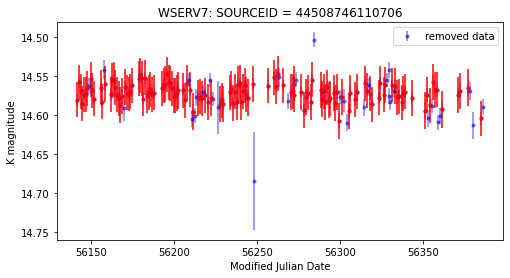

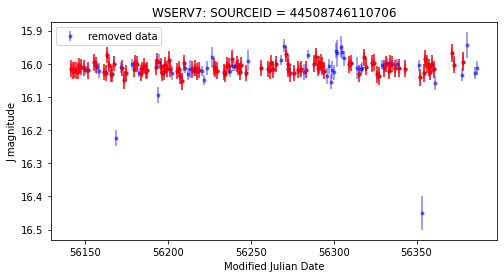

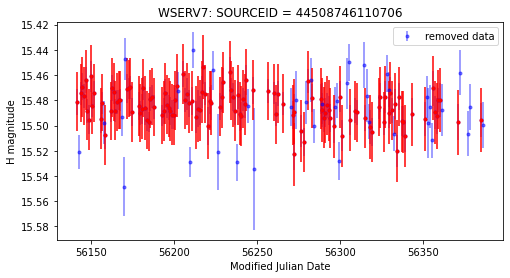

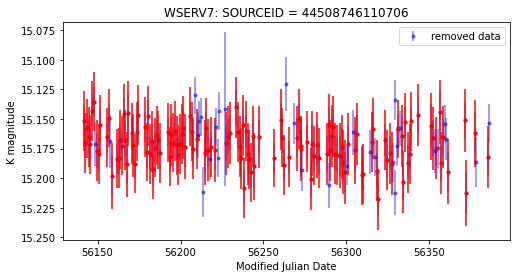

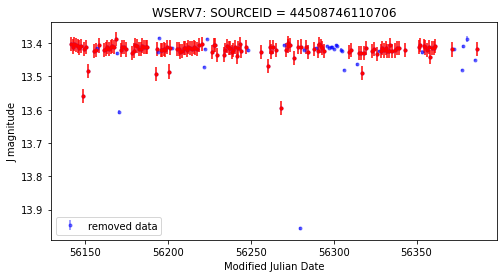

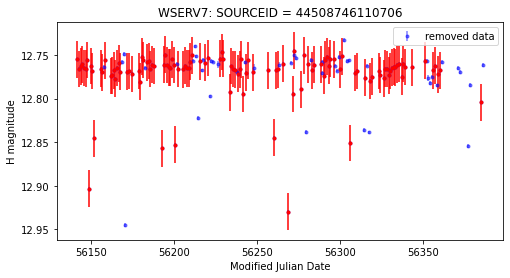

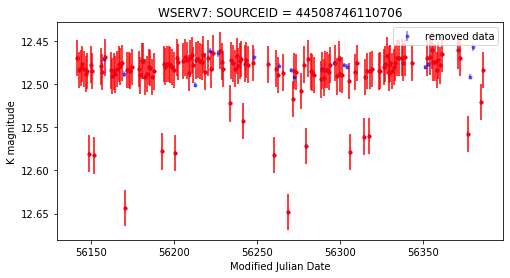

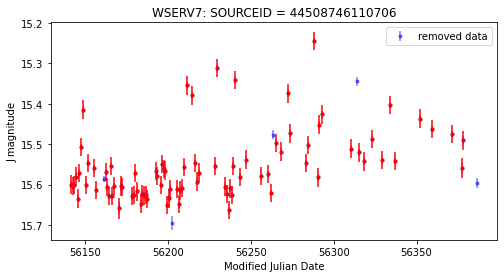

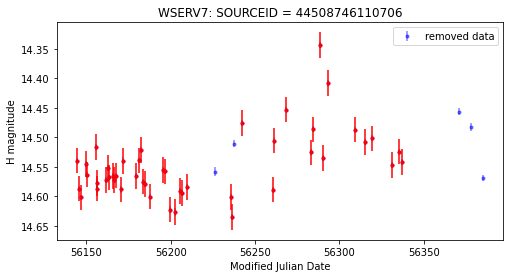

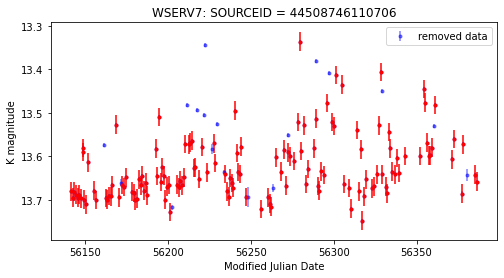

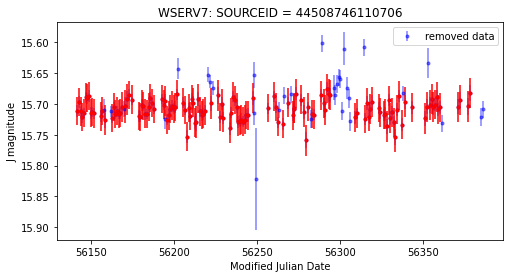

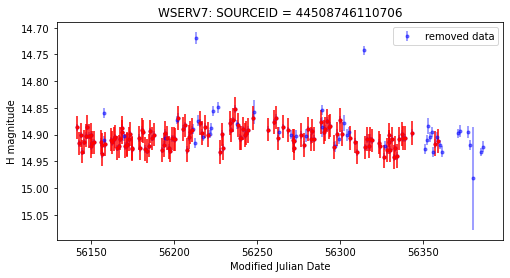

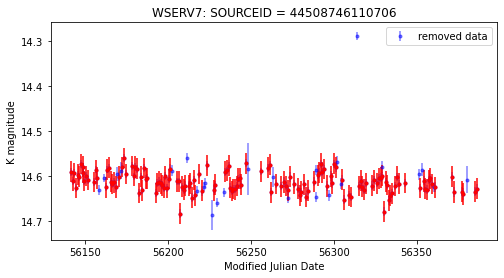

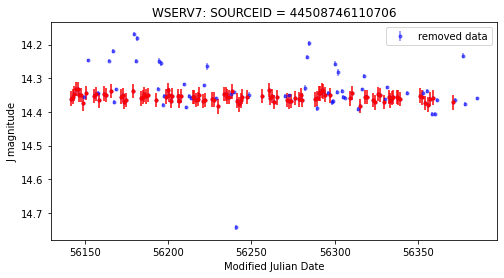

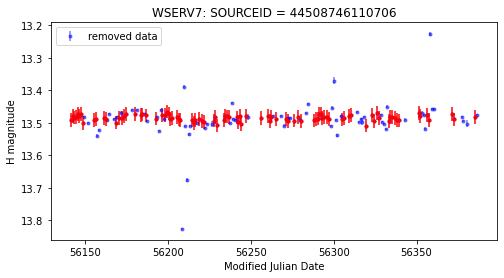

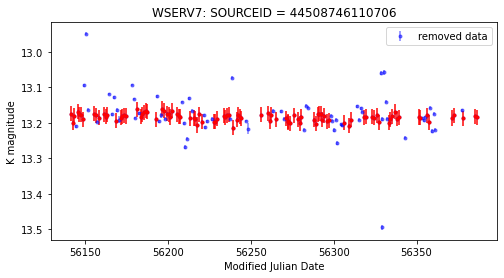

In [54]:
ten_random_stars_w7 = np.random.choice(np.unique(choosing_data_w7['SOURCEID']), 10, replace=False)

print(ten_random_stars_w7)

for star in ten_random_stars_w7:
    removal_figure(unclean_data_w7, cleaned_data_w7, star, survey='WSERV7', band='J')
    removal_figure(unclean_data_w7, cleaned_data_w7, star, survey='WSERV7', band='H')
    removal_figure(unclean_data_w7, cleaned_data_w7, star, survey='WSERV7', band='K')
    

In [25]:
# now let's do ten random stars from each of the other four regions!



-999999500.0

In [55]:
# wserv1

path_to_full_unclean_WSERV1 = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads/wserv1.fits.gz"
unclean_data_w1 = astropy.table.Table.read(path_to_full_unclean_WSERV1)
cleaned_data_w1 = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv1/WSERV1_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

choosing_data_w1 = cleaned_data_w1[
    (cleaned_data_w1['JAPERMAG3'] > 12) & 
    (cleaned_data_w1['HAPERMAG3'] > 12) & 
    (cleaned_data_w1['KAPERMAG3'] > 12) & 
    (cleaned_data_w1['JAPERMAG3'] < 16) & 
    (cleaned_data_w1['HAPERMAG3'] < 16) & 
    (cleaned_data_w1['KAPERMAG3'] < 16)
]

[44027710183605 44027709820782 44027710153507 44027709814138
 44027709909899 44027709777931 44027709874042 44027709788797
 44027710113221 44027709818451]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


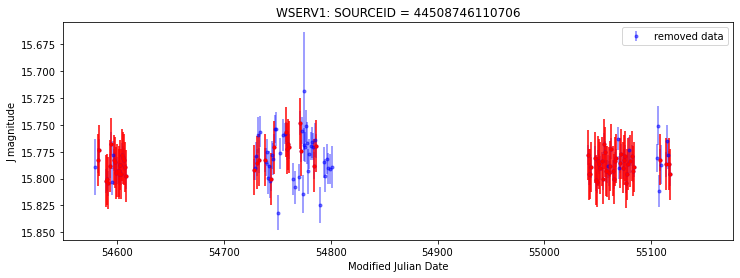

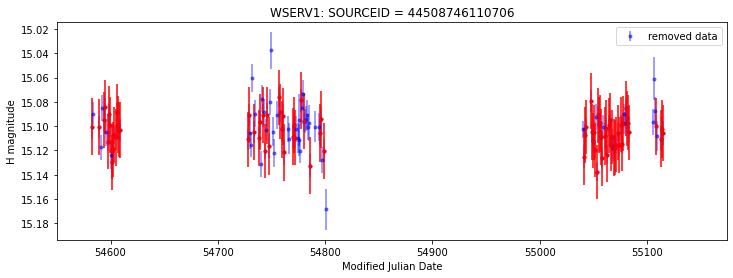

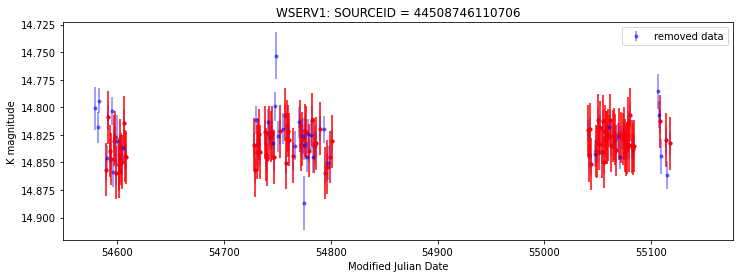

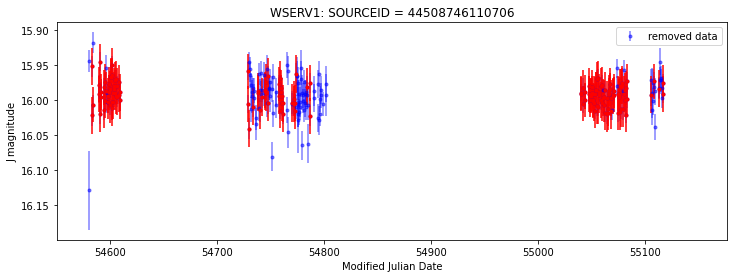

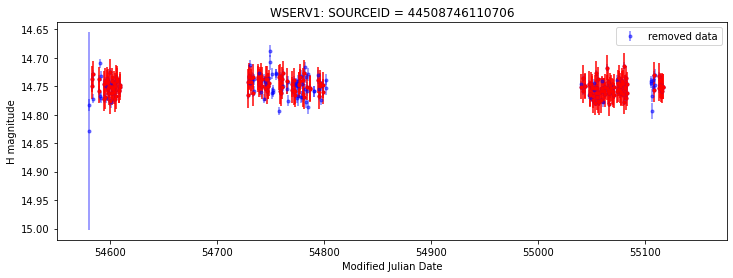

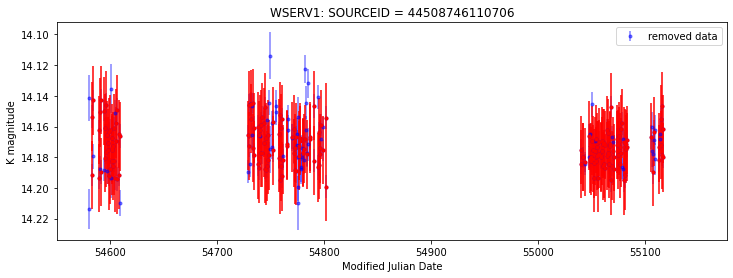

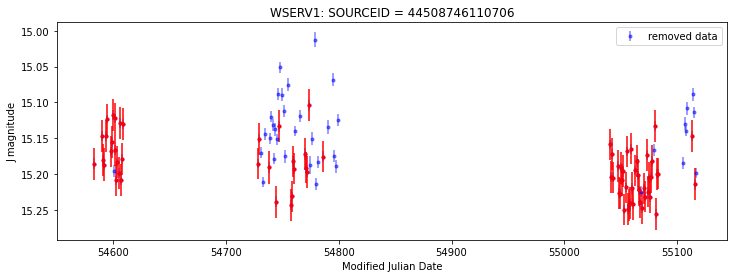

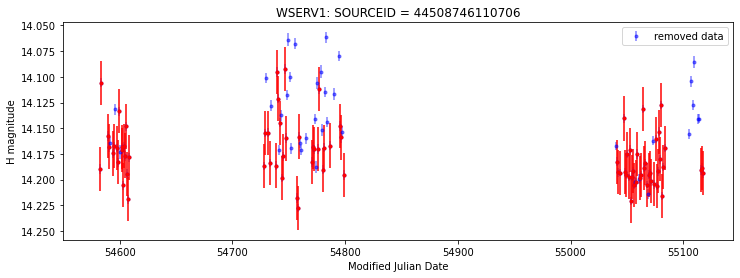

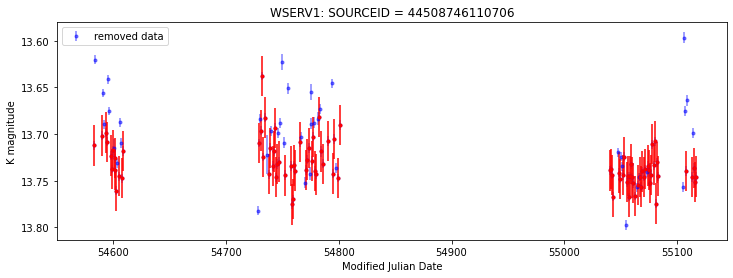

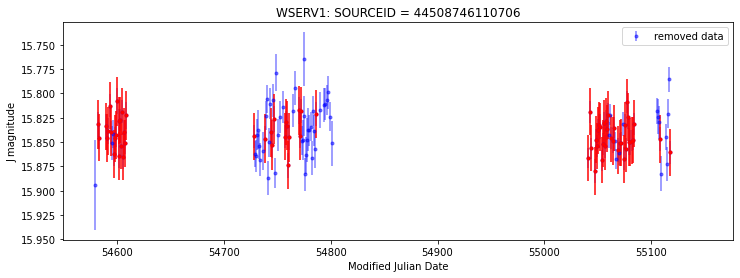

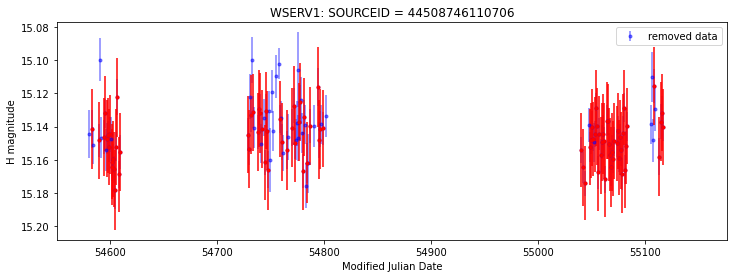

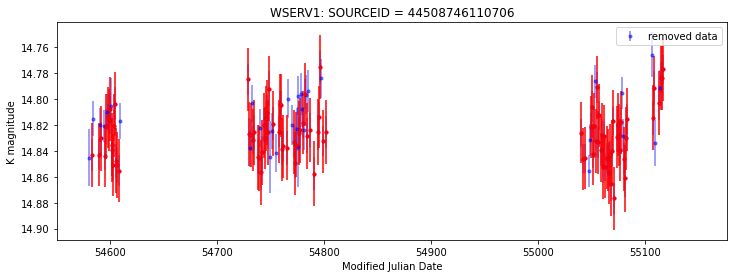

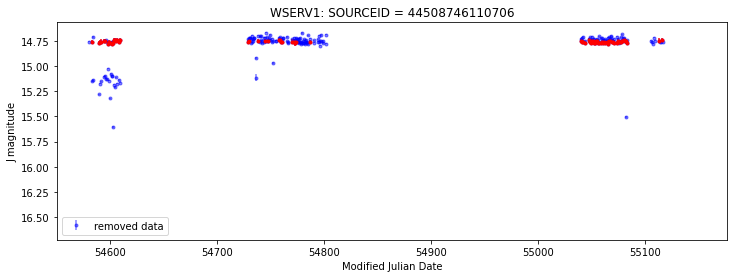

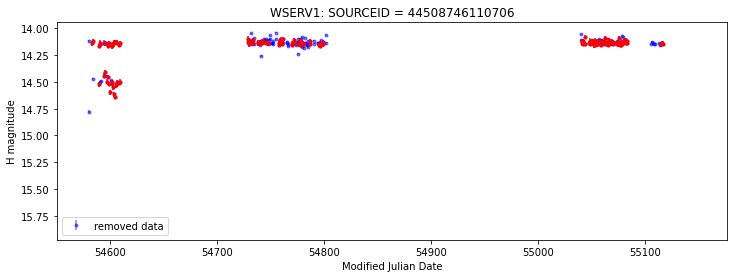

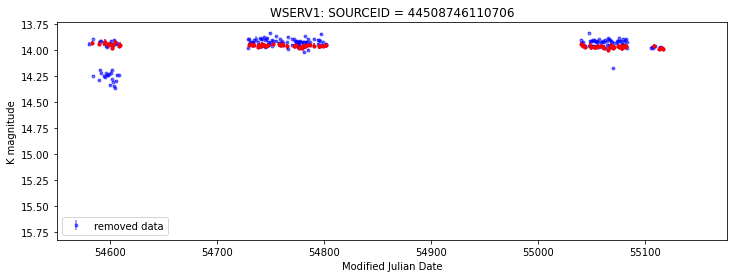

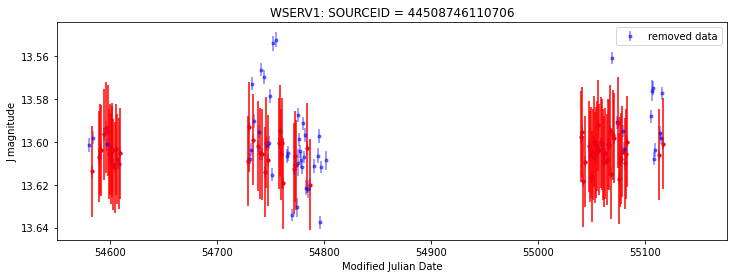

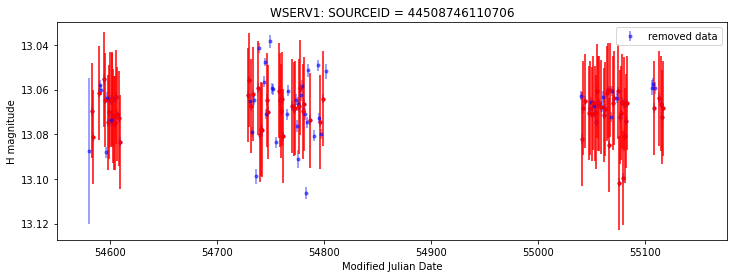

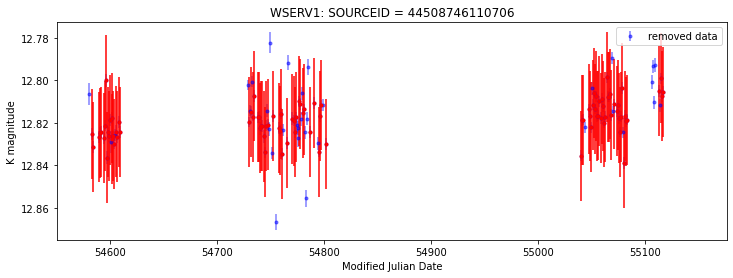

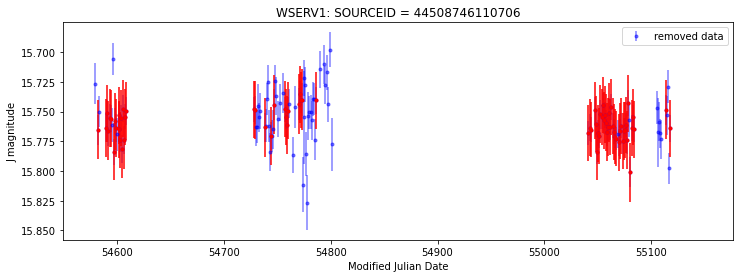

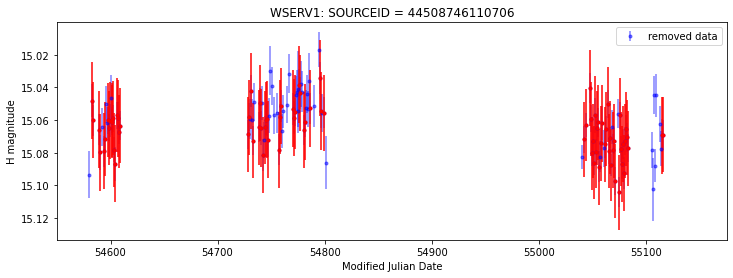

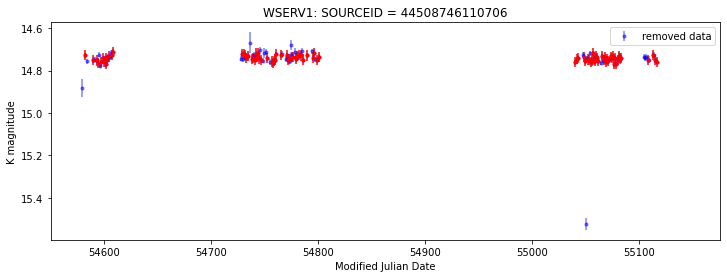

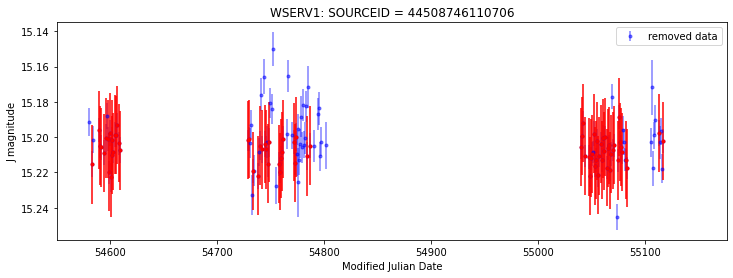

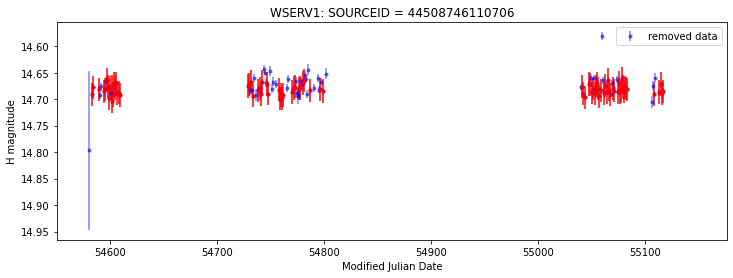

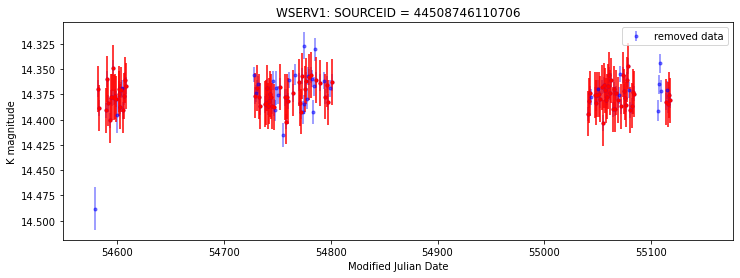

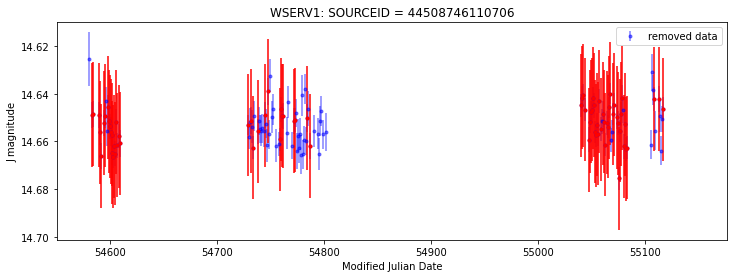

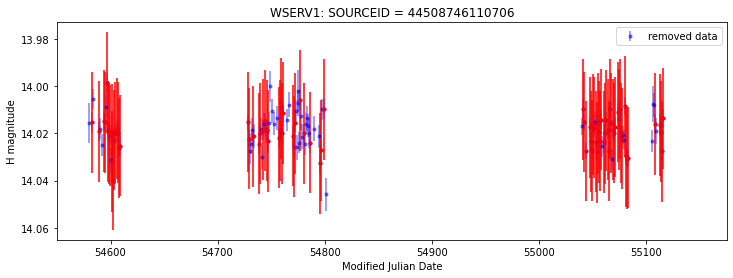

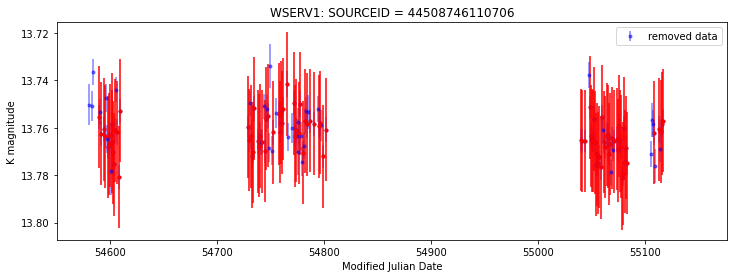

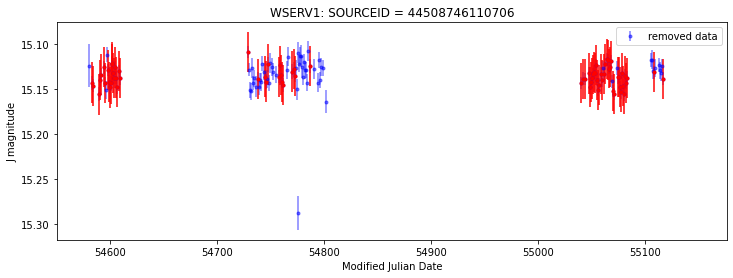

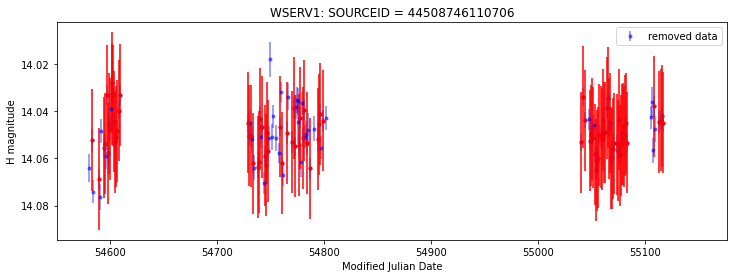

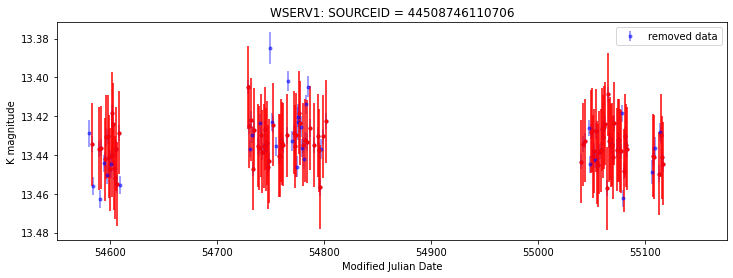

In [56]:
ten_random_stars_w1 = np.random.choice(np.unique(choosing_data_w1['SOURCEID']), 10, replace=False)

print(ten_random_stars_w1)

for star in ten_random_stars_w1:
    removal_figure(unclean_data_w1, cleaned_data_w1, star, survey='WSERV1', band='J', figsize=(12,4))
    plt.xlim(54550, None)
    removal_figure(unclean_data_w1, cleaned_data_w1, star, survey='WSERV1', band='H', figsize=(12,4))
    plt.xlim(54550, None)
    removal_figure(unclean_data_w1, cleaned_data_w1, star, survey='WSERV1', band='K', figsize=(12,4))
    plt.xlim(54550, None)
    

In [43]:
# a note: wserv1 seems to be VERY dominated by faint stars. I think I'd promised I'd do some histograms of the magnitude ranges represented?

In [57]:
# wserv5

path_to_full_unclean_WSERV5 = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads/wserv5.fits.gz"
unclean_data_w5 = astropy.table.Table.read(path_to_full_unclean_WSERV5)
cleaned_data_w5 = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv5/WSERV5_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

choosing_data_w5 = cleaned_data_w5[
    (cleaned_data_w5['JAPERMAG3'] > 12) & 
    (cleaned_data_w5['HAPERMAG3'] > 12) & 
    (cleaned_data_w5['KAPERMAG3'] > 12) & 
    (cleaned_data_w5['JAPERMAG3'] < 16) & 
    (cleaned_data_w5['HAPERMAG3'] < 16) & 
    (cleaned_data_w5['KAPERMAG3'] < 16)
]

[44199508506301 44199508495208 44199508556183 44199508524773
 44199508554542 44199508485692 44199508519319 44199508513257
 44199508533536 44199508470518]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


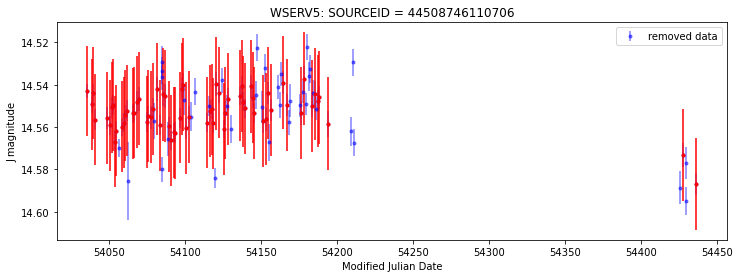

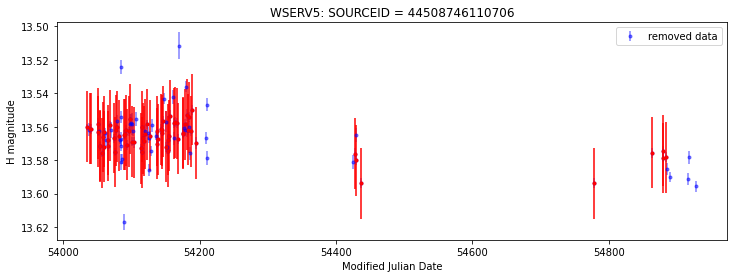

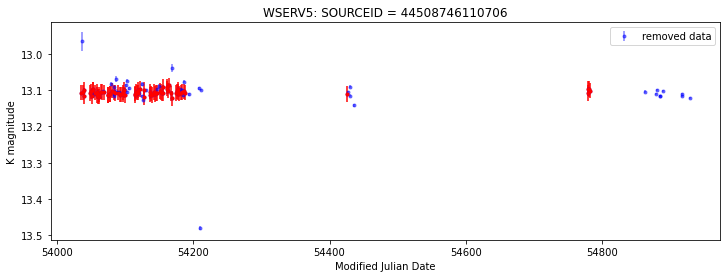

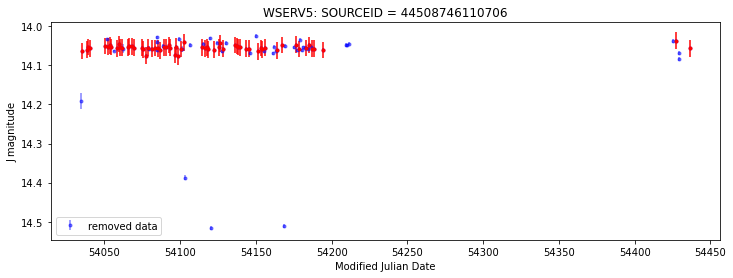

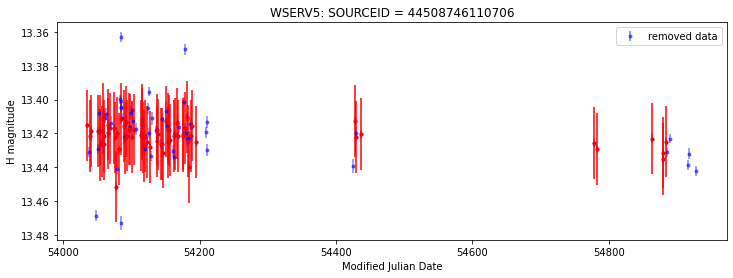

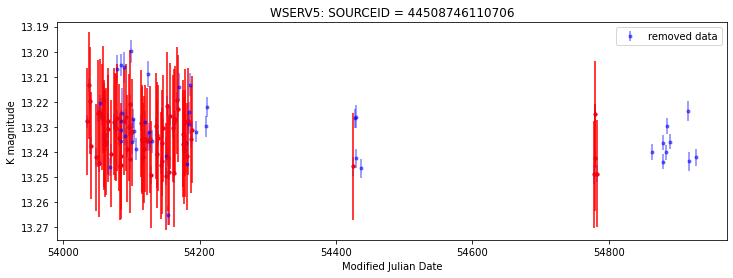

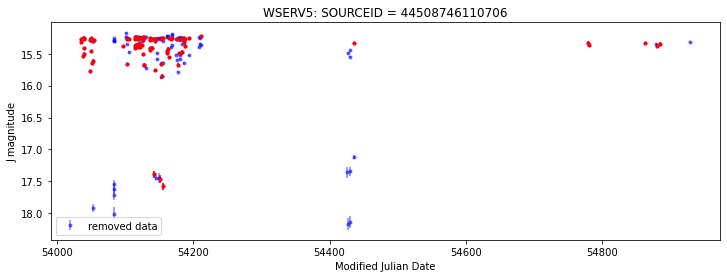

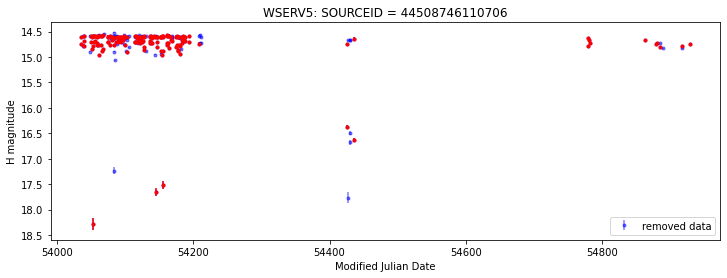

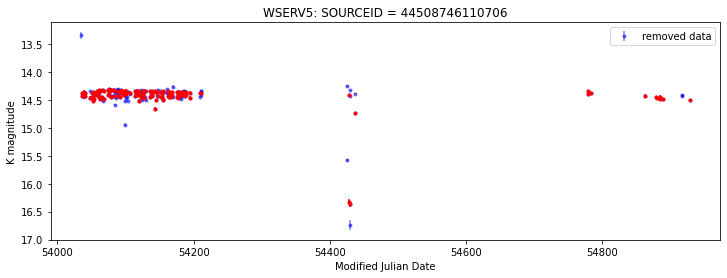

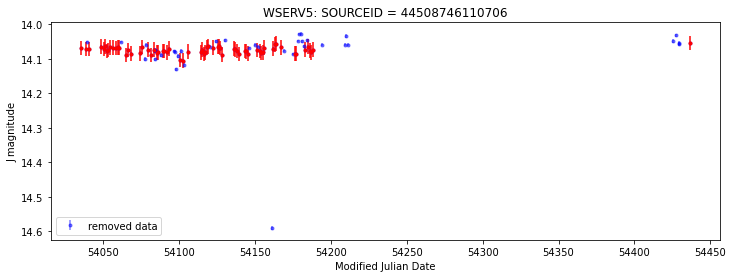

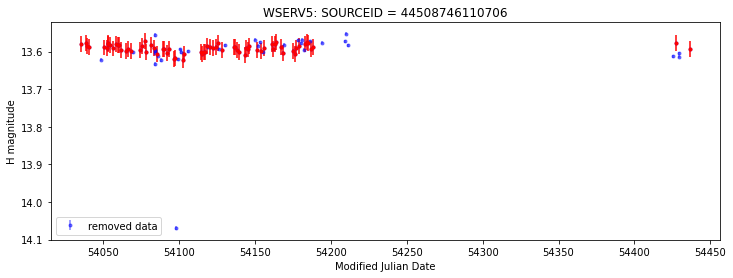

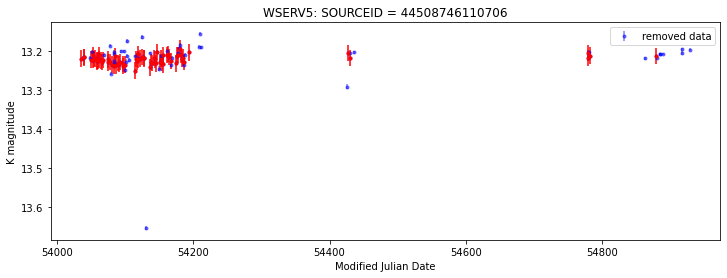

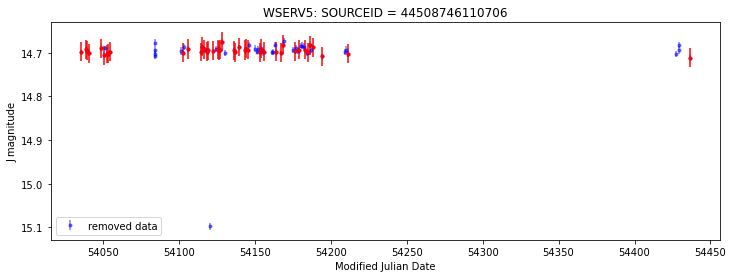

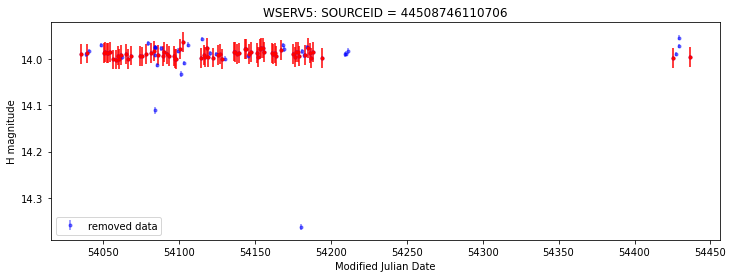

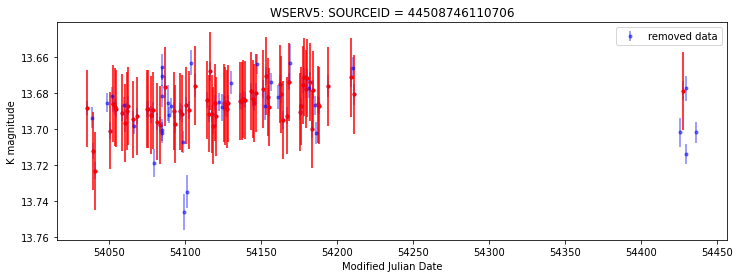

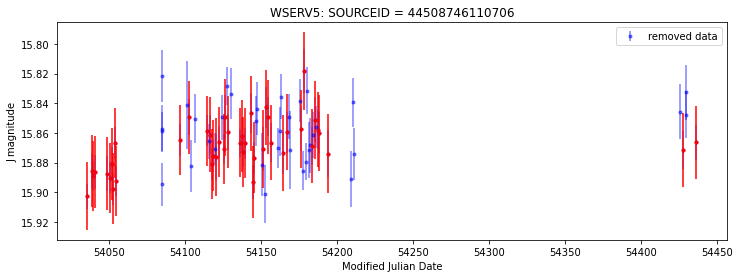

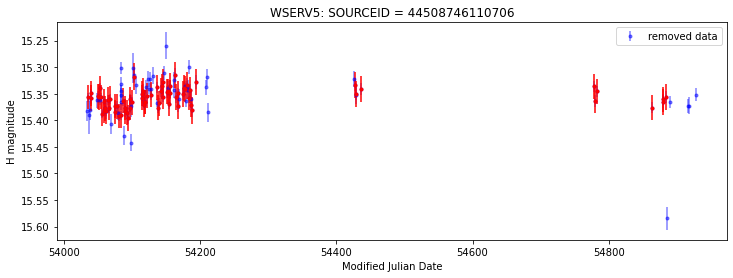

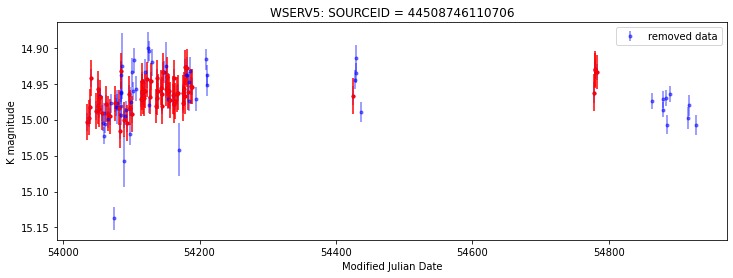

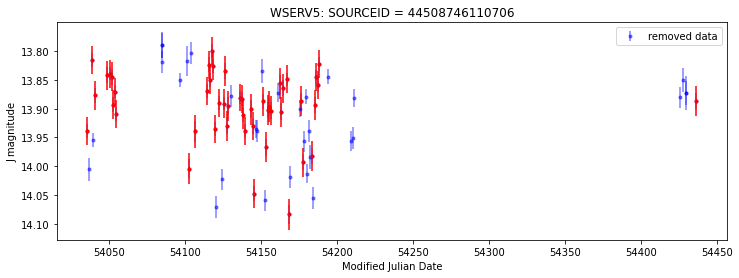

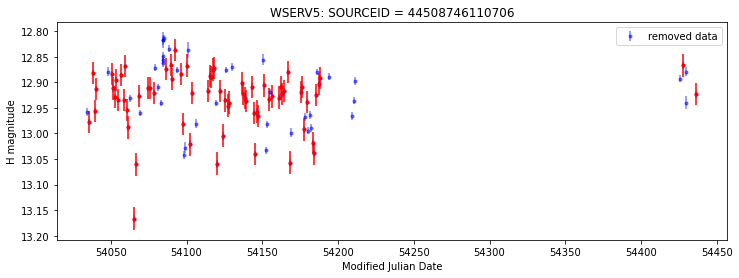

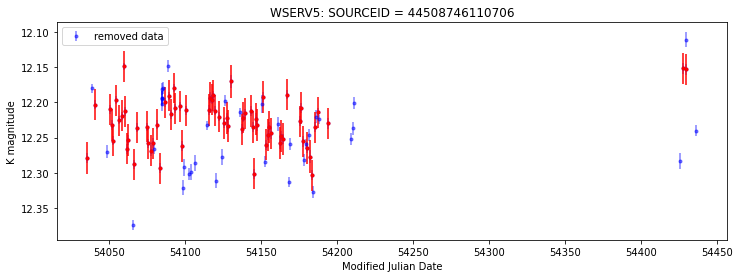

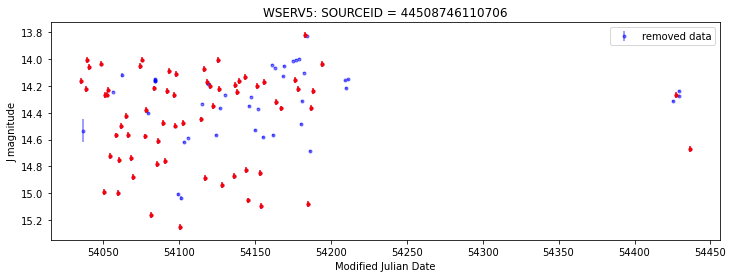

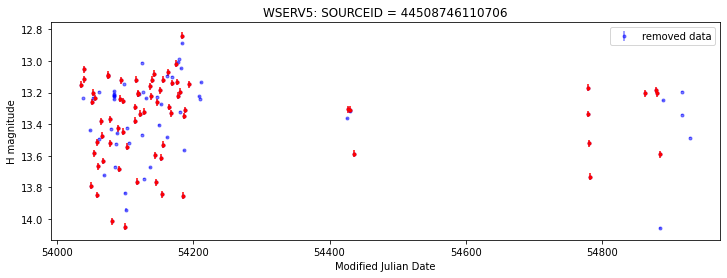

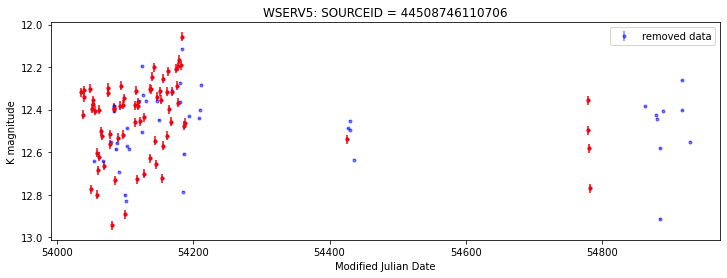

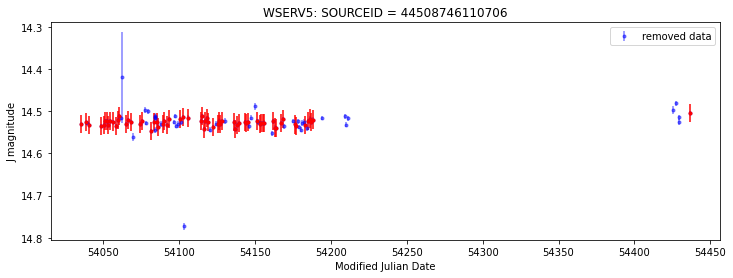

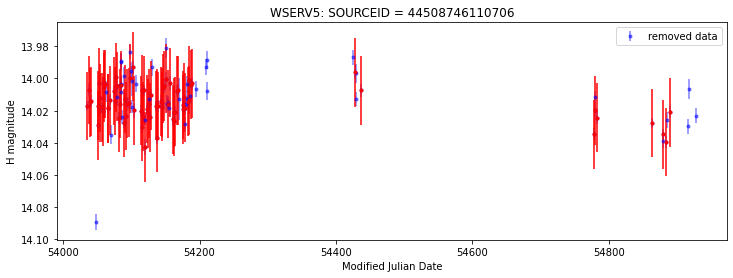

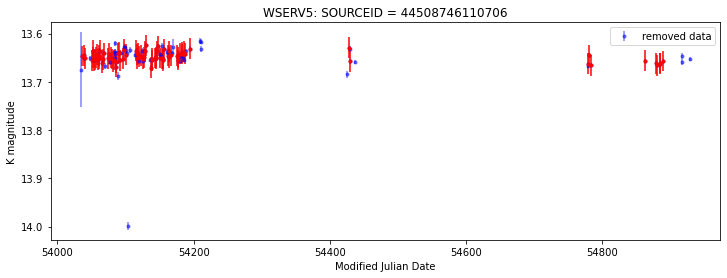

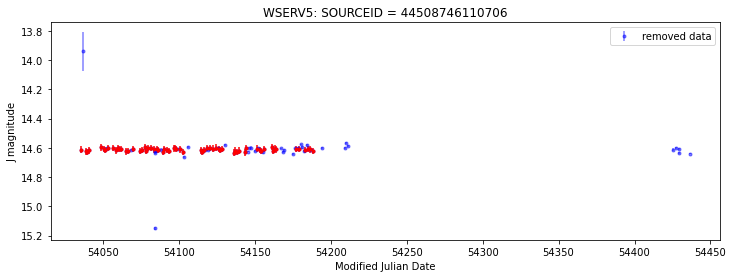

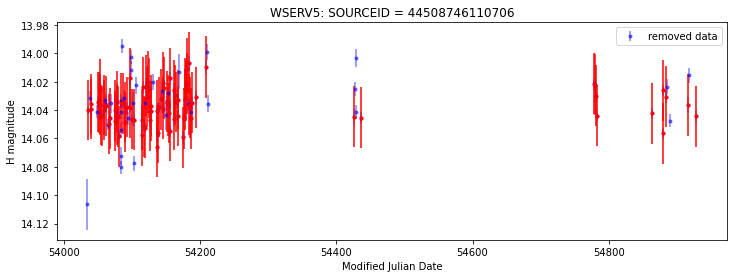

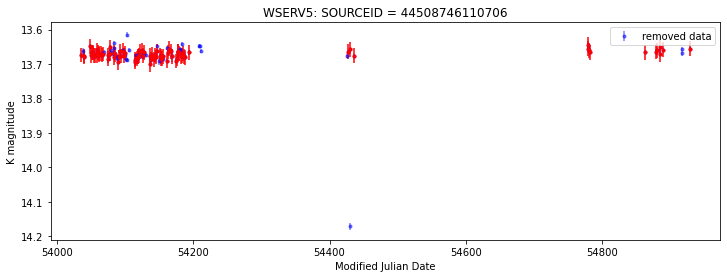

In [58]:
ten_random_stars_w5 = np.random.choice(np.unique(choosing_data_w5['SOURCEID']), 10, replace=False)

print(ten_random_stars_w5)

for star in ten_random_stars_w5:
    removal_figure(unclean_data_w5, cleaned_data_w5, star, survey='WSERV5', band='J', figsize=(12,4))
    removal_figure(unclean_data_w5, cleaned_data_w5, star, survey='WSERV5', band='H', figsize=(12,4))
    removal_figure(unclean_data_w5, cleaned_data_w5, star, survey='WSERV5', band='K', figsize=(12,4))
    

In [59]:
# wserv8

path_to_full_unclean_WSERV8 = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads/wserv8.fits.gz"
unclean_data_w8 = astropy.table.Table.read(path_to_full_unclean_WSERV8)
cleaned_data_w8 = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv8/WSERV8_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

choosing_data_w8 = cleaned_data_w8[
    (cleaned_data_w8['JAPERMAG3'] > 12) & 
    (cleaned_data_w8['HAPERMAG3'] > 12) & 
    (cleaned_data_w8['KAPERMAG3'] > 12) & 
    (cleaned_data_w8['JAPERMAG3'] < 16) & 
    (cleaned_data_w8['HAPERMAG3'] < 16) & 
    (cleaned_data_w8['KAPERMAG3'] < 16)
]

[44989782502118 44989782451619 44989782487687 44989782467283
 44989782457948 44989782481192 44989782430176 44989782490646
 44989782441067 44989782464295]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


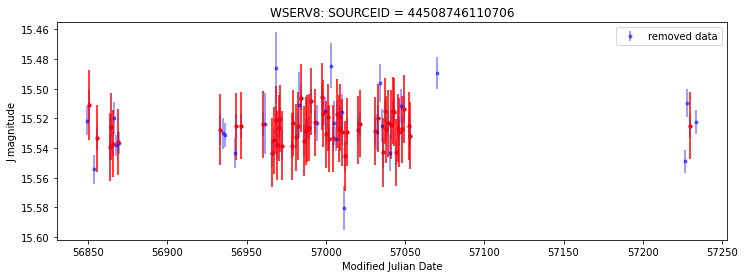

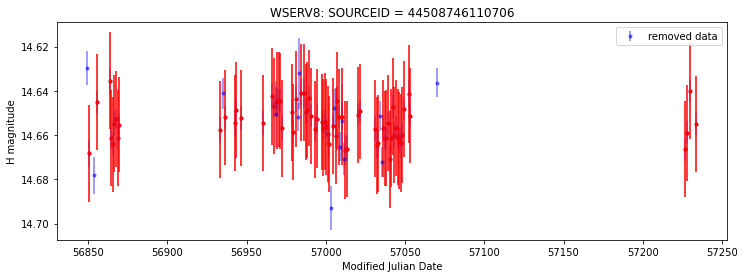

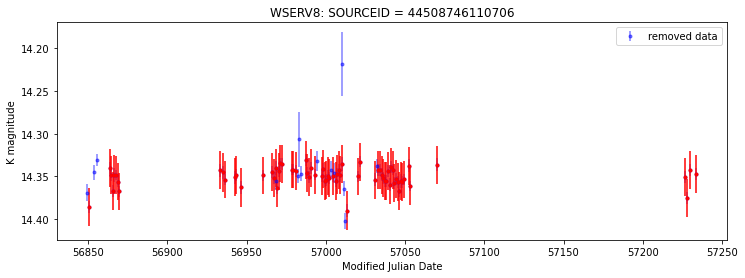

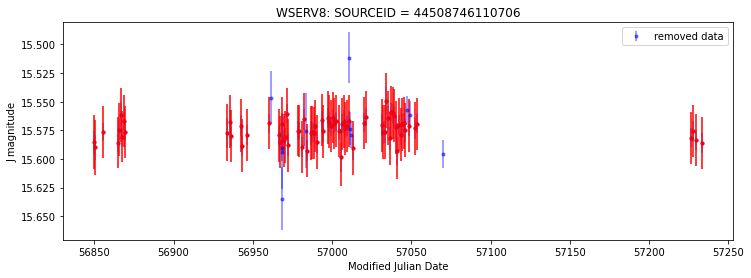

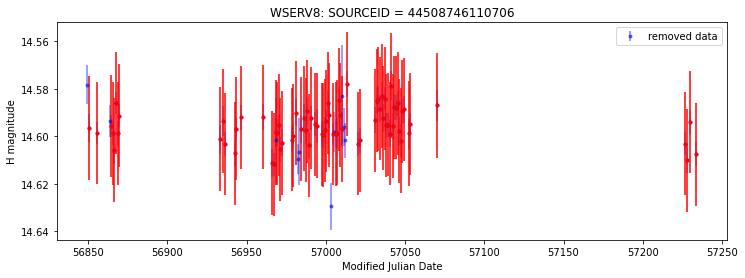

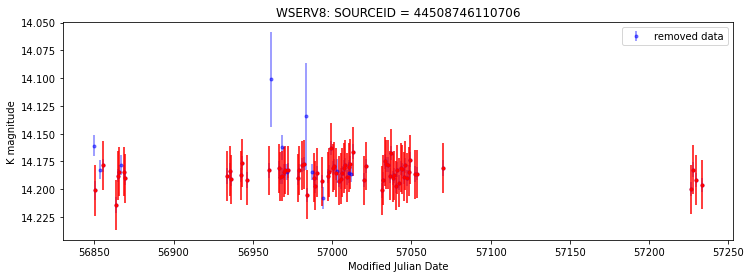

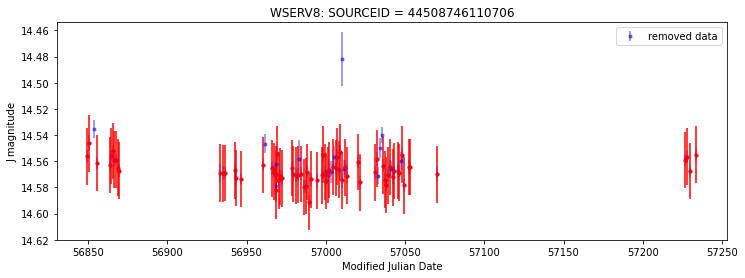

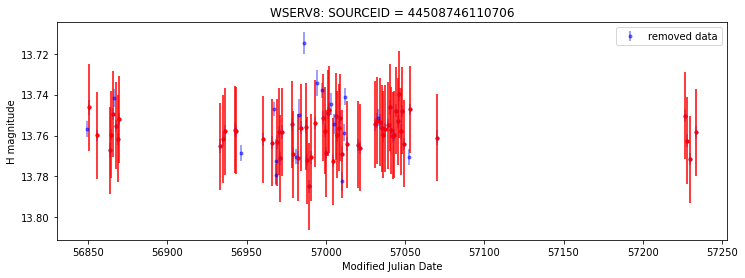

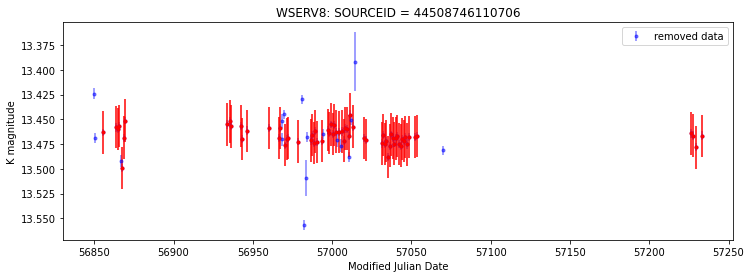

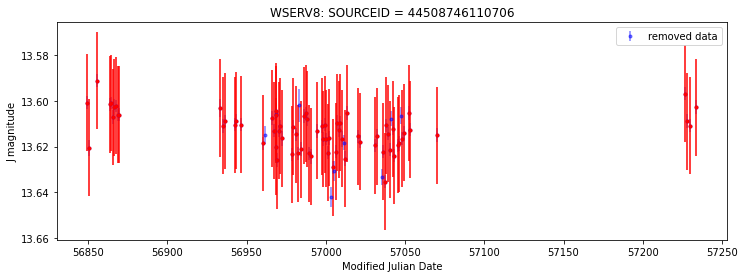

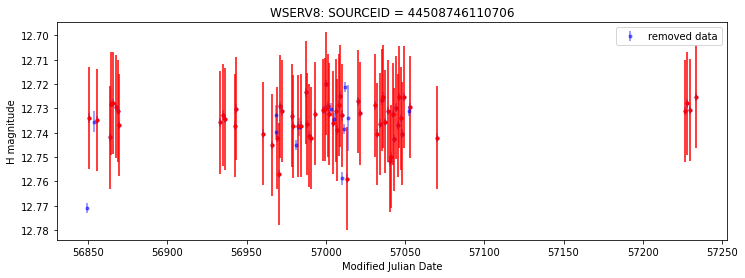

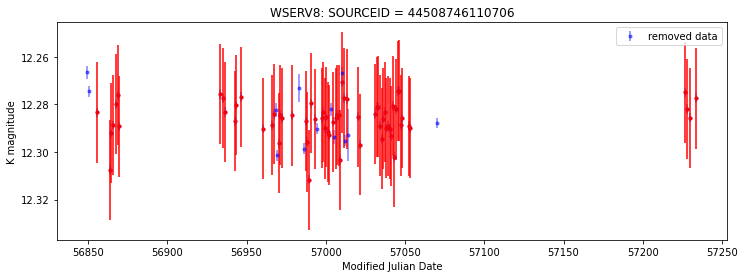

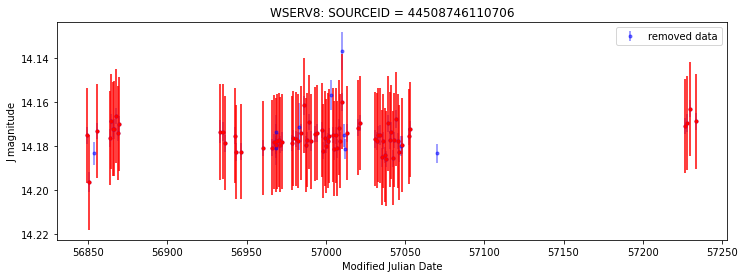

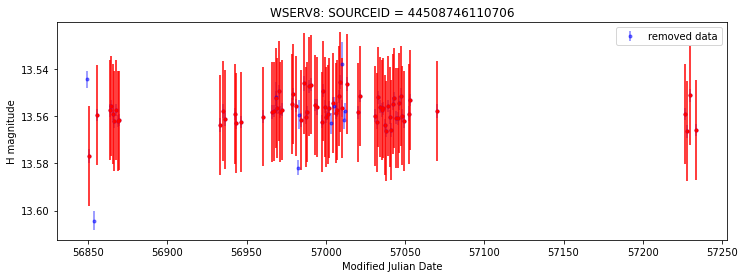

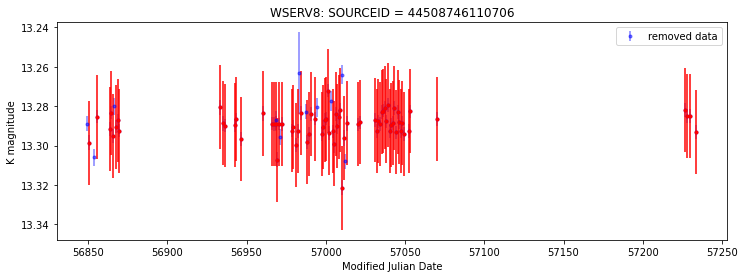

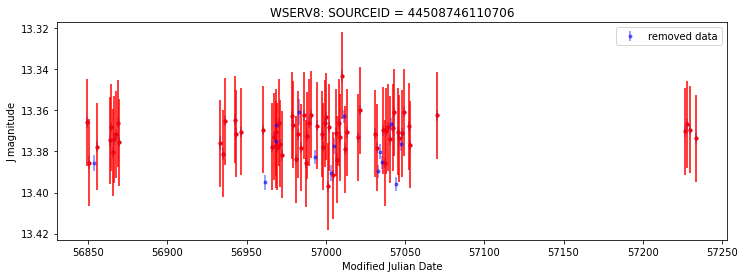

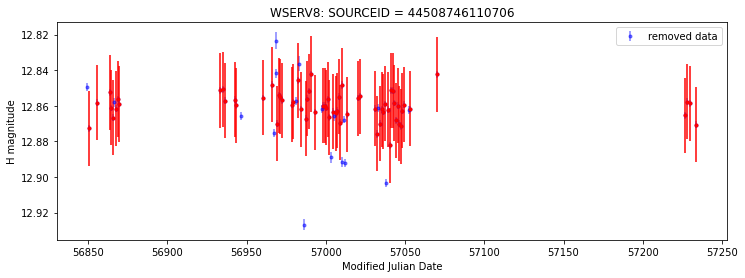

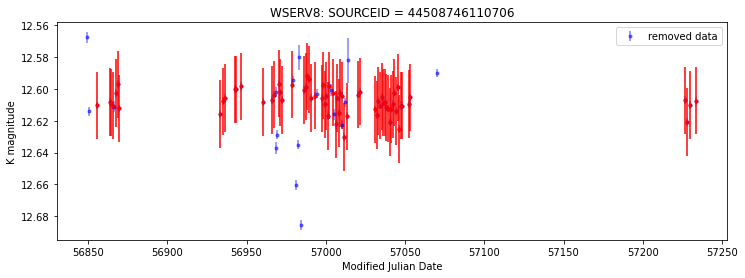

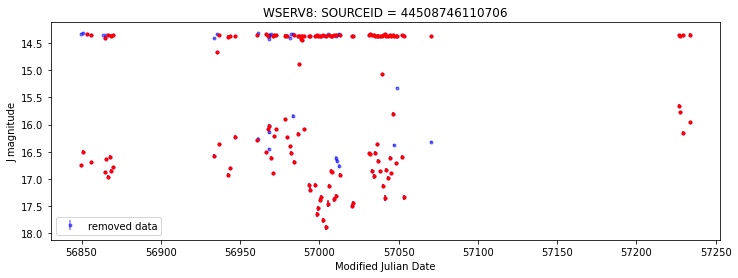

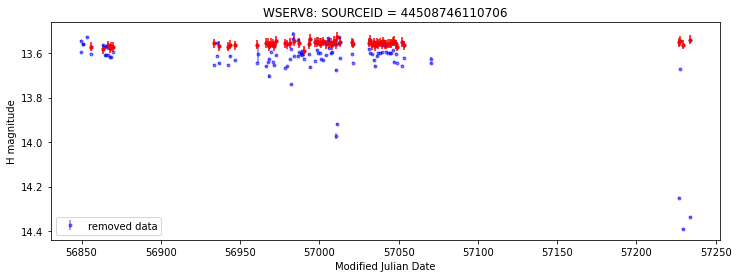

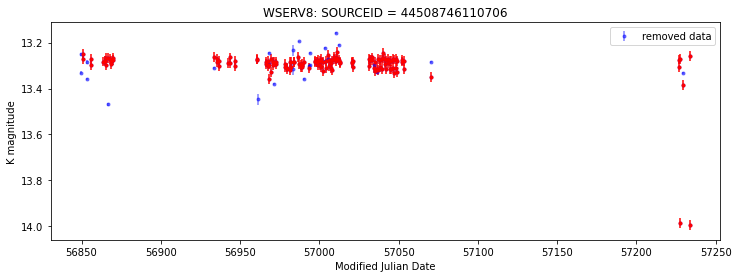

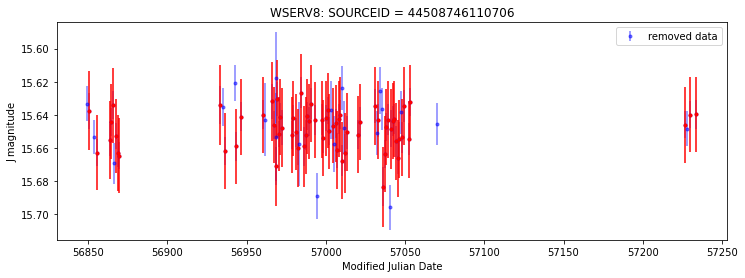

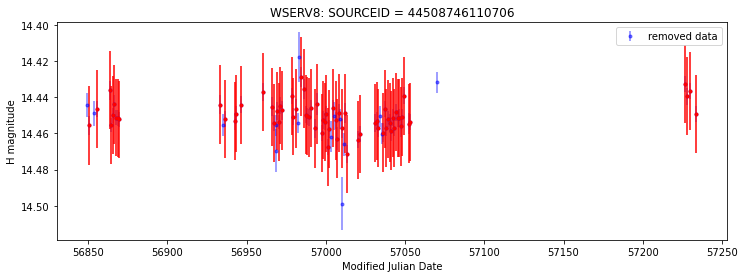

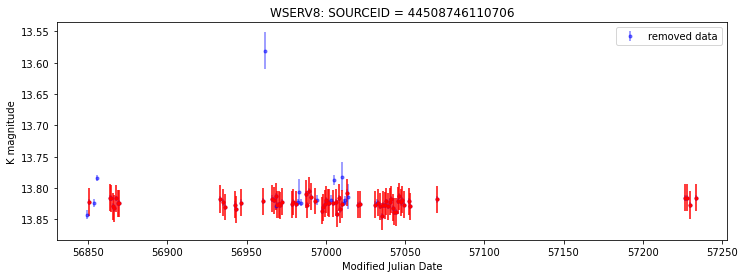

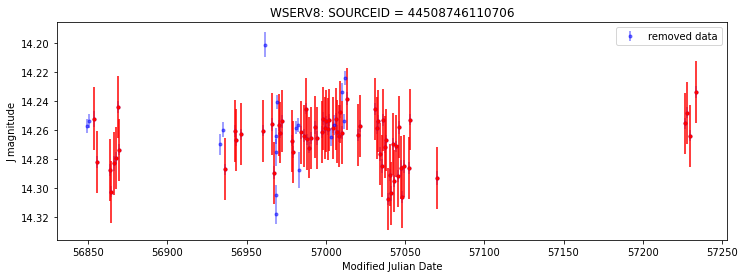

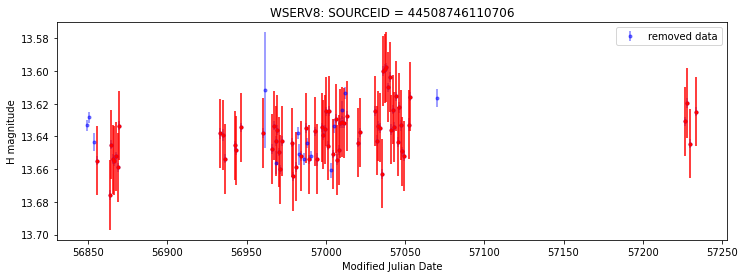

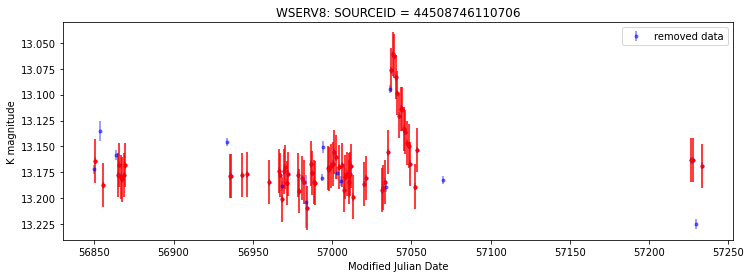

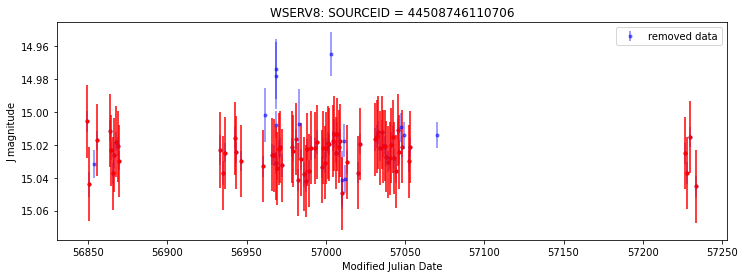

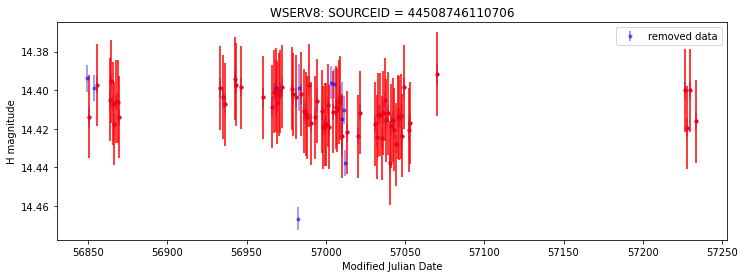

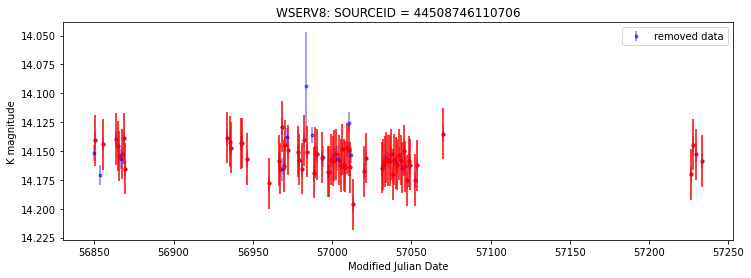

In [60]:
ten_random_stars_w8 = np.random.choice(np.unique(choosing_data_w8['SOURCEID']), 10, replace=False)

print(ten_random_stars_w8)

for star in ten_random_stars_w8:
    removal_figure(unclean_data_w8, cleaned_data_w8, star, survey='WSERV8', band='J', figsize=(12,4))
    removal_figure(unclean_data_w8, cleaned_data_w8, star, survey='WSERV8', band='H', figsize=(12,4))
    removal_figure(unclean_data_w8, cleaned_data_w8, star, survey='WSERV8', band='K', figsize=(12,4))
    

In [61]:
# wserv11

path_to_full_unclean_WSERV11 = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/Raw_Downloads/wserv11.fits.gz"
unclean_data_w11 = astropy.table.Table.read(path_to_full_unclean_WSERV11)
cleaned_data_w11 = astropy.table.Table.read("/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/reduction_artifacts/wserv11/WSERV11_graded_clipped0.95_scrubbed0.1_dusted0.5.h5")

choosing_data_w11 = cleaned_data_w11[
    (cleaned_data_w11['JAPERMAG3'] > 12) & 
    (cleaned_data_w11['HAPERMAG3'] > 12) & 
    (cleaned_data_w11['KAPERMAG3'] > 12) & 
    (cleaned_data_w11['JAPERMAG3'] < 16) & 
    (cleaned_data_w11['HAPERMAG3'] < 16) & 
    (cleaned_data_w11['KAPERMAG3'] < 16)
]

[45195940897581 45195940859824 45195940899319 45195940882805
 45195940860886 45195940886799 45195940868405 45195940903078
 45195940883997 45195940880546]


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


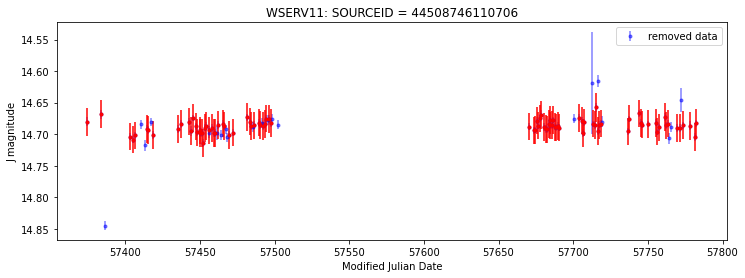

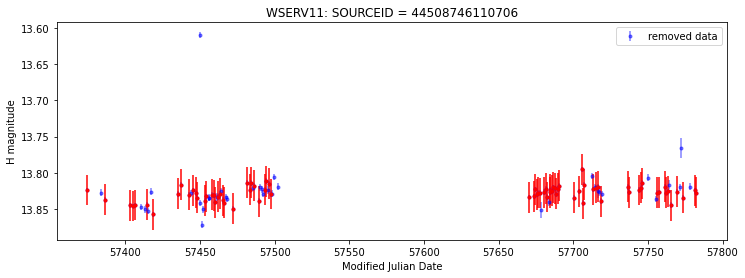

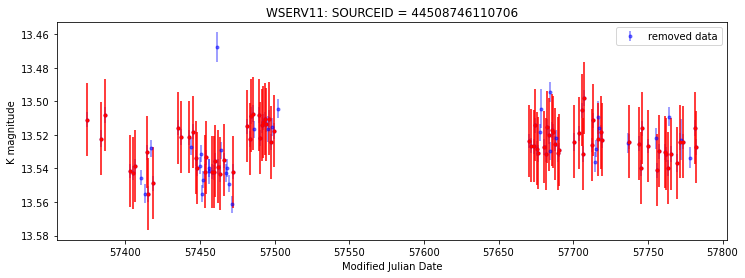

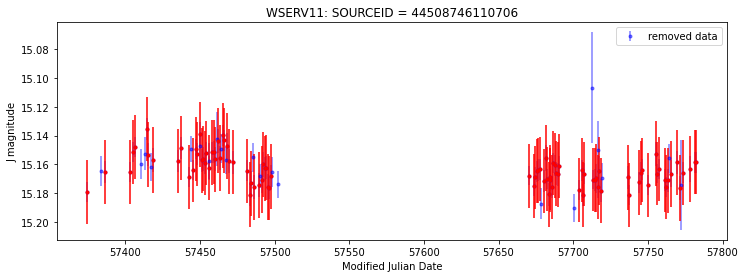

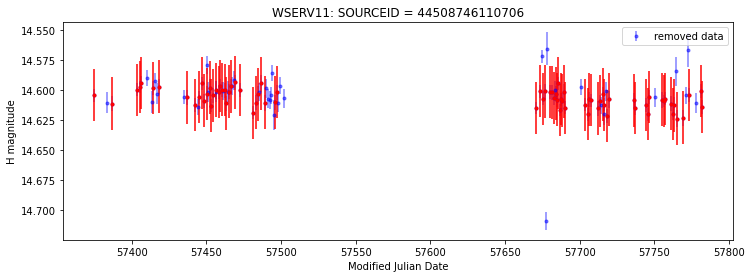

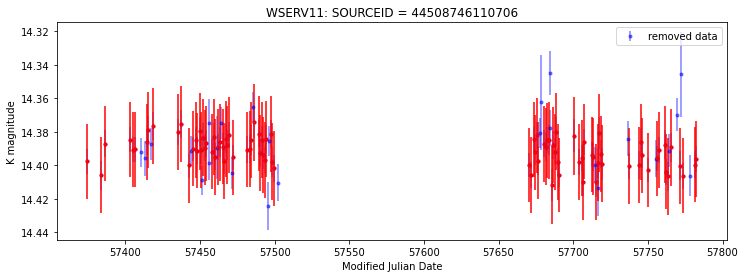

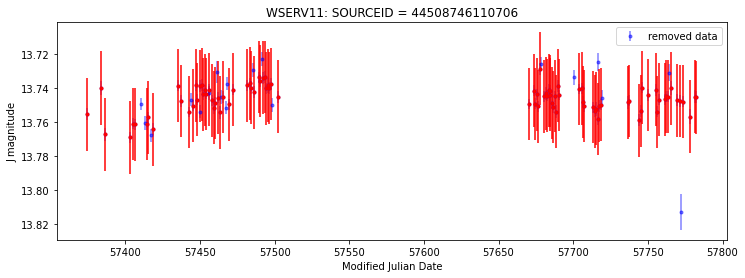

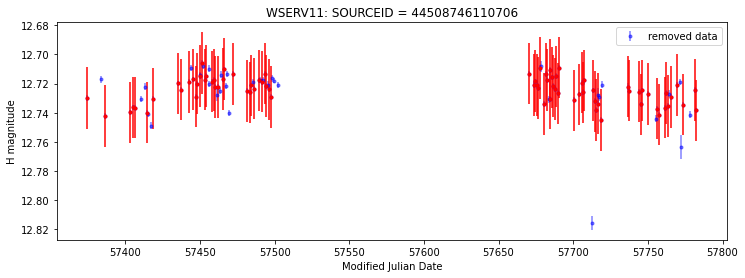

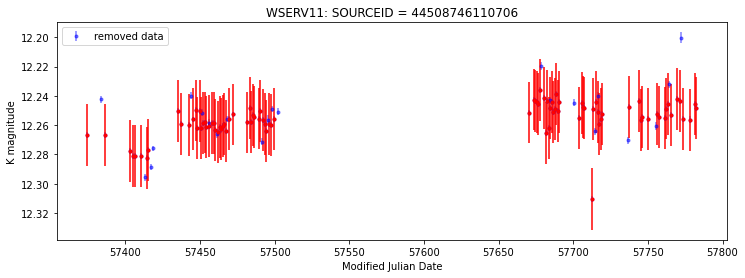

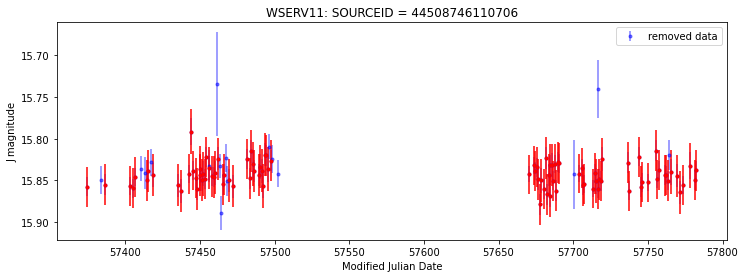

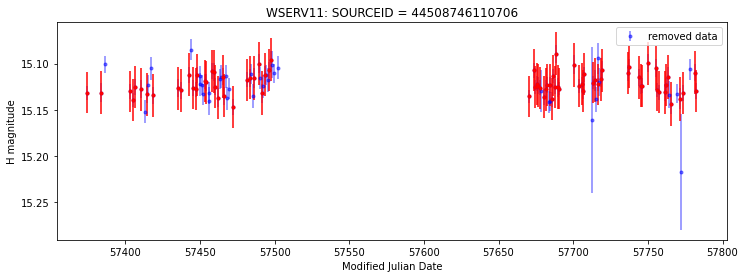

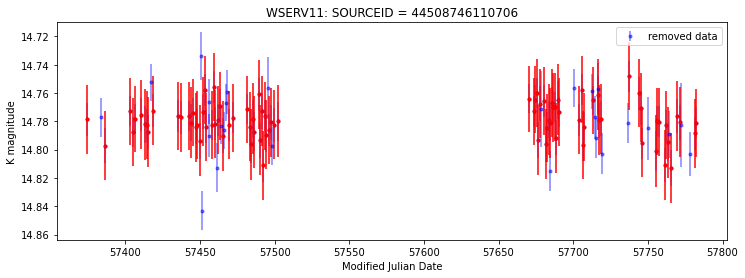

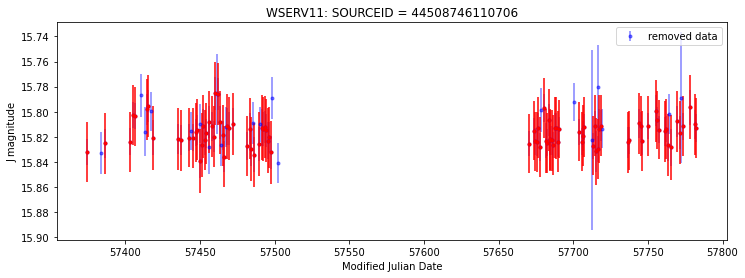

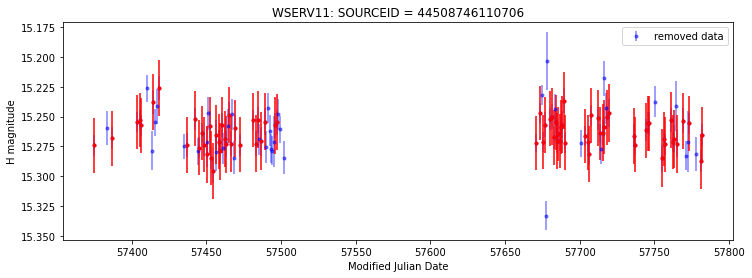

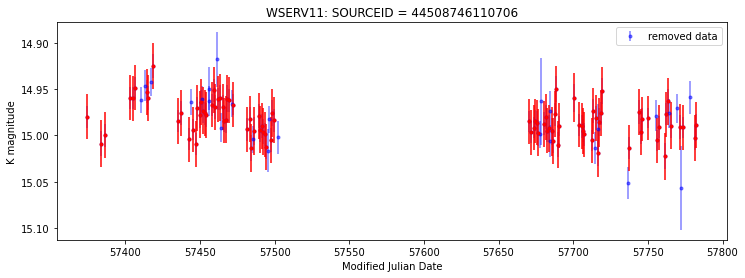

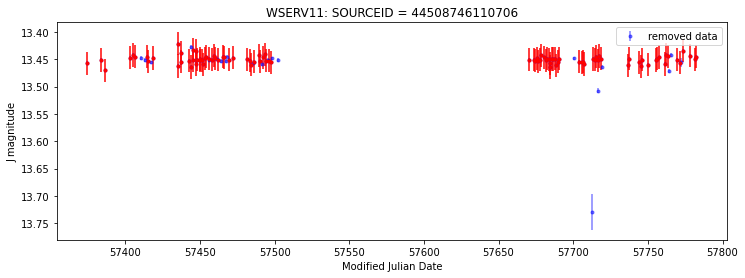

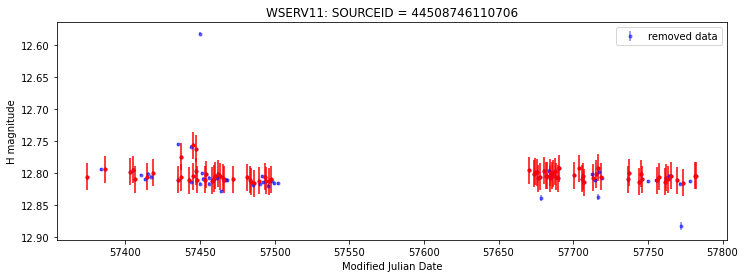

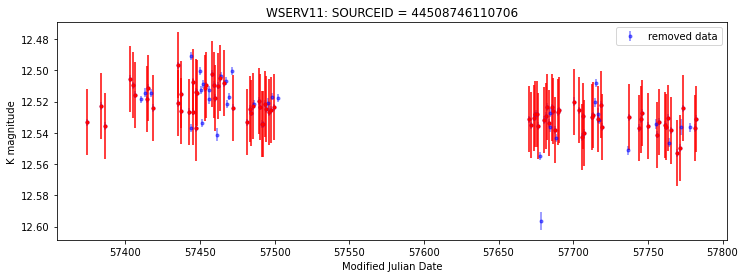

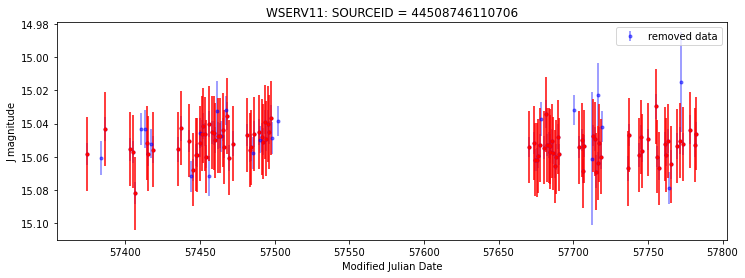

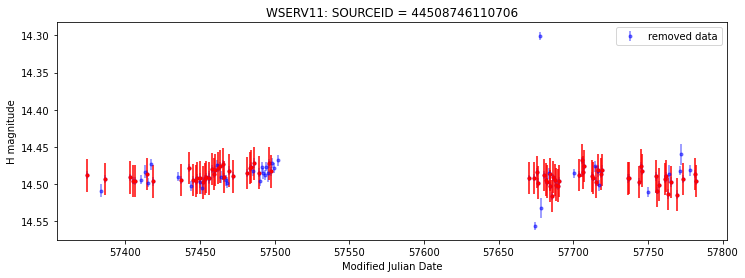

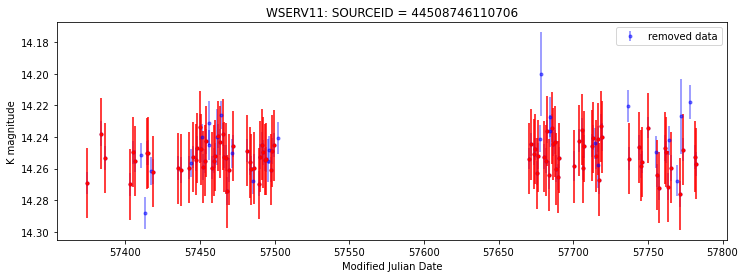

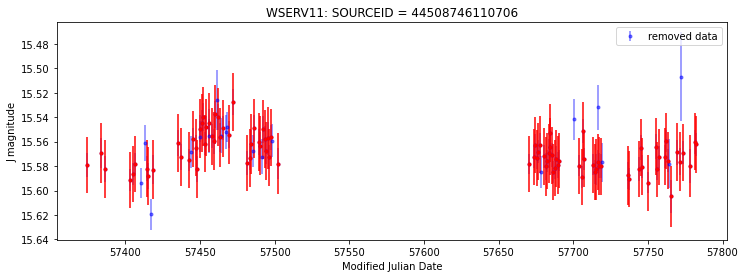

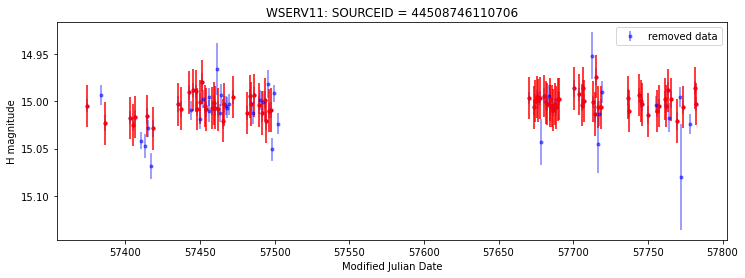

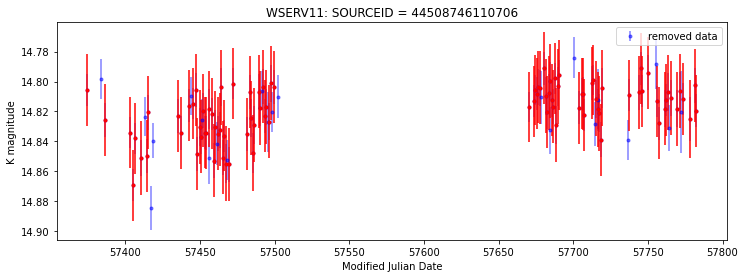

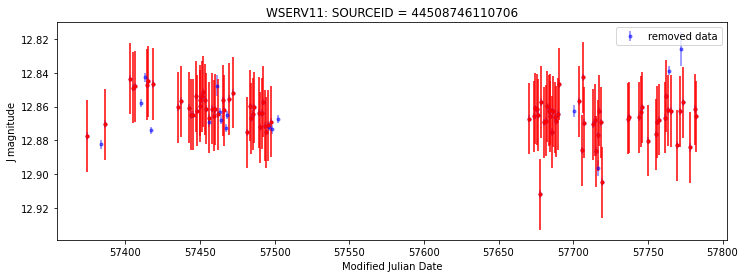

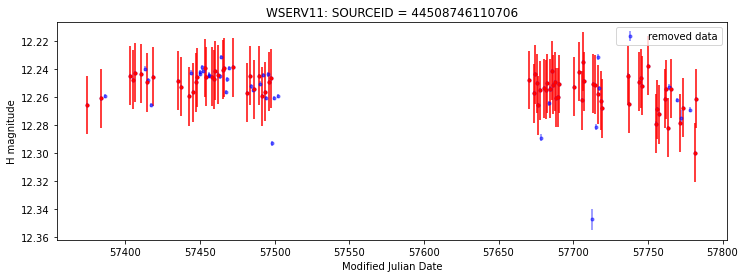

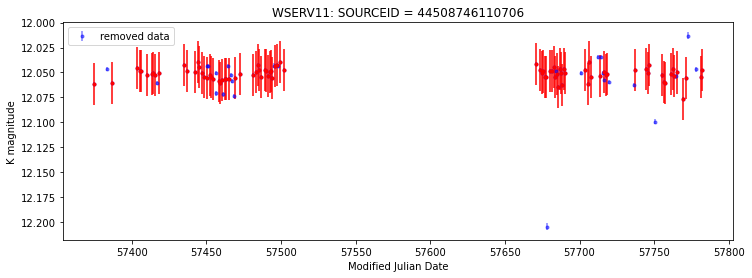

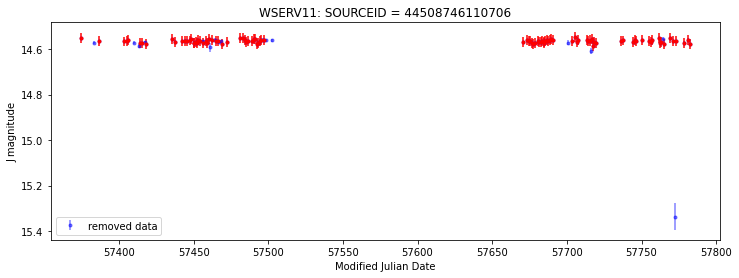

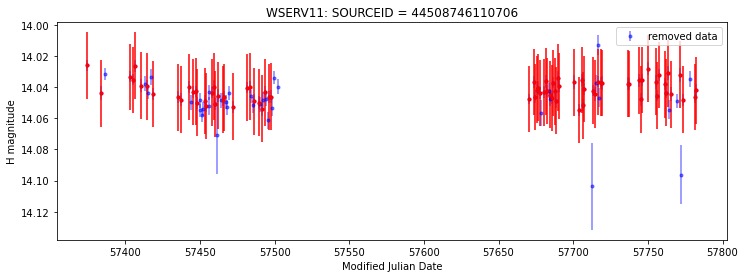

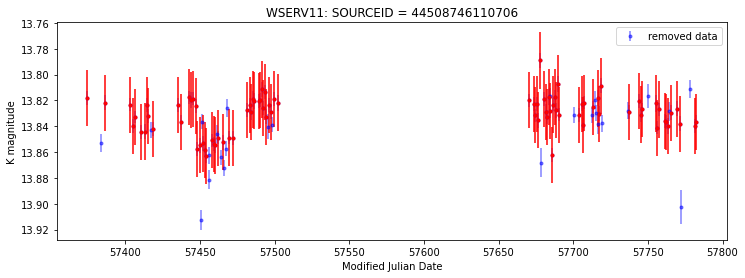

In [62]:
ten_random_stars_w11 = np.random.choice(np.unique(choosing_data_w11['SOURCEID']), 10, replace=False)

print(ten_random_stars_w11)

for star in ten_random_stars_w11:
    removal_figure(unclean_data_w11, cleaned_data_w11, star, survey='WSERV11', band='J', figsize=(12,4))
    removal_figure(unclean_data_w11, cleaned_data_w11, star, survey='WSERV11', band='H', figsize=(12,4))
    removal_figure(unclean_data_w11, cleaned_data_w11, star, survey='WSERV11', band='K', figsize=(12,4))
    